# This script contains the following chapters:
1. Import of libraries and data
2. Creating Region column
3. Creating visualizations for report

# 1. Importing data and libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create path for easier data import
path = r'C:\Users\magia\06-2025 Instacart Basket Analysis'

In [3]:
# importing data set using path variable
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [4]:
# creating crosstab
crosstab = pd.crosstab(df['days_between_orders'], df['order_number'], dropna = False)

In [5]:
# copying crosstab table to clipboard for viewing in Excel
crosstab.to_clipboard()

2. Creating Region column

In [6]:
# Define regions
northeast = [
    "Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island",
    "Connecticut", "New York", "Pennsylvania", "New Jersey"
]

midwest = [
    "Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota",
    "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"
]

south = [
    "Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia",
    "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky",
    "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"
]

west = [
    "Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado",
    "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", "Hawaii"
]

In [7]:
# Map states to regions
def get_region(state):
    if state in northeast:
        return "Northeast"
    elif state in midwest:
        return "Midwest"
    elif state in south:
        return "South"
    else:
        return "West"

In [8]:
# Apply to DataFrame
df['region'] = df['state'].apply(get_region)

In [9]:
# Preview
df[['state', 'region']].head()

,state,region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South


In [10]:
# Check for any unmatched states
df[df['region'] == 'Unknown']['state'].unique()

array([], dtype=object)

# 3. Creating visualizations for report

In [11]:
#creating crosstable to determine if there is a difference in spending among regions
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [12]:
crosstab.to_clipboard()

In [13]:
# value counts for each price_range label
df['price_range'].value_counts()

price_range
Mid-range product    21861558
Low-range product    10130750
High range             412551
Name: count, dtype: int64

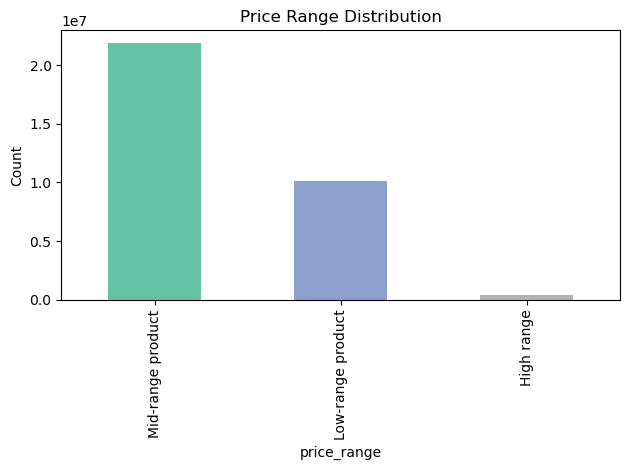

In [14]:
# Create the bar chart
bar = df['price_range'].value_counts().plot.bar(
    color=['#66c2a5', '#8da0cb', '#b3b3b3']
)

# Customizations
plt.title('Price Range Distribution')
plt.ylabel('Count')
plt.tight_layout()

# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_product_department.png'))

plt.show()

In [15]:
# exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

In [16]:
# renaming departments
dept_map = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
    21: "missing"
}

In [17]:
# applying map to df
df['department_id'] = df['department_id'].map(dept_map)

In [18]:
# Count how many times each department_id appears (i.e., how many orders per department)
dept_counts = df['department_id'].value_counts()


In [19]:
dept_counts

department_id
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

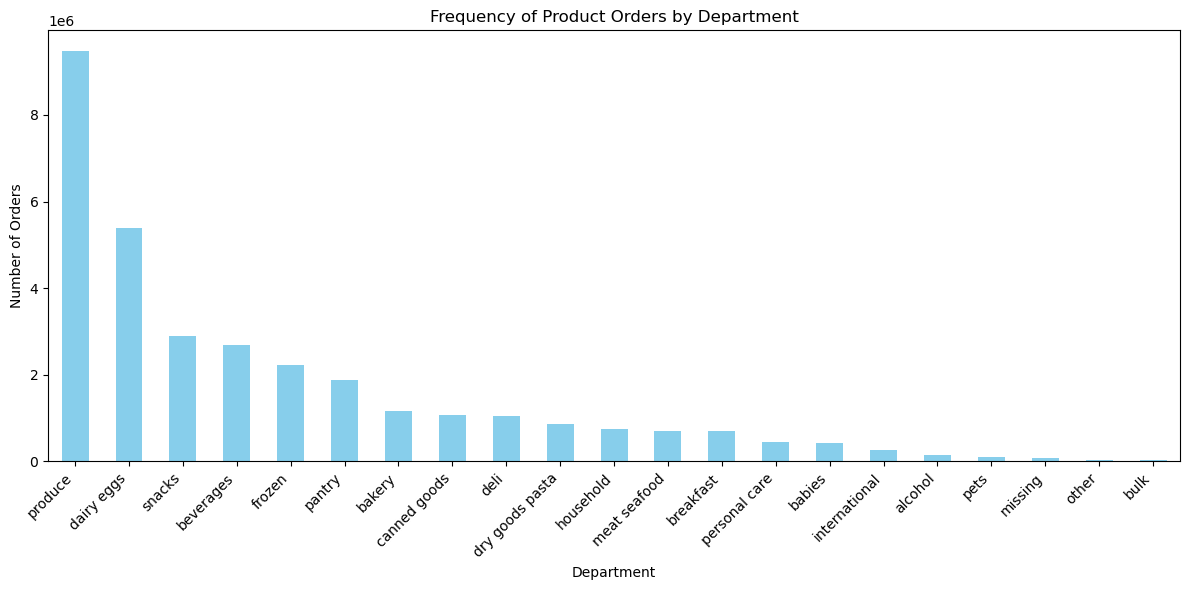

In [20]:
# Create bar chart sorted highest to lowest
bar = dept_counts.sort_values(ascending=False).plot.bar(figsize=(12,6), color='skyblue')

plt.title('Frequency of Product Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_product_department.png'))

In [22]:
df['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

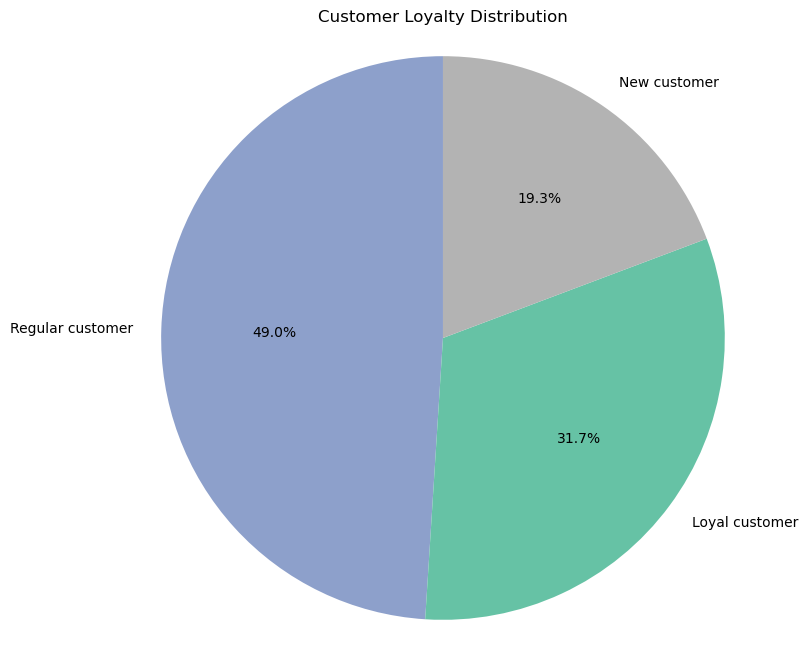

In [23]:
# creating pie chart for loyalty_flag

colors = ['#8da0cb',  # skyblue (Set2 color #2)
          '#66c2a5',  # soft green (Set2 color #1)
          '#b3b3b3']  # gray (Set2 color #7)

# Get value counts
loyalty_counts = df['loyalty_flag'].value_counts()

# Plot pie chart
fig = plt.figure(figsize=(8, 8))

plt.pie(
    loyalty_counts, 
    labels=loyalty_counts.index, 
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Customer Loyalty Distribution')
plt.axis('equal')

fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty_distribution.png'))

plt.show()


In [24]:
# creating crosstab between loyalty and spending
crosstab = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)

In [25]:
crosstab.to_clipboard()

In [26]:
# Define income bins and labels
bins = [0, 70000, 120000, float('inf')]
labels = ['Low', 'Middle', 'High']

# Create binned income column
df['income_group'] = pd.cut(df['income'], bins=bins, labels=labels)

In [27]:
# crosstab income and region
crosstab = pd.crosstab(df['region'], df['income_group'], dropna=False)
crosstab.to_clipboard()

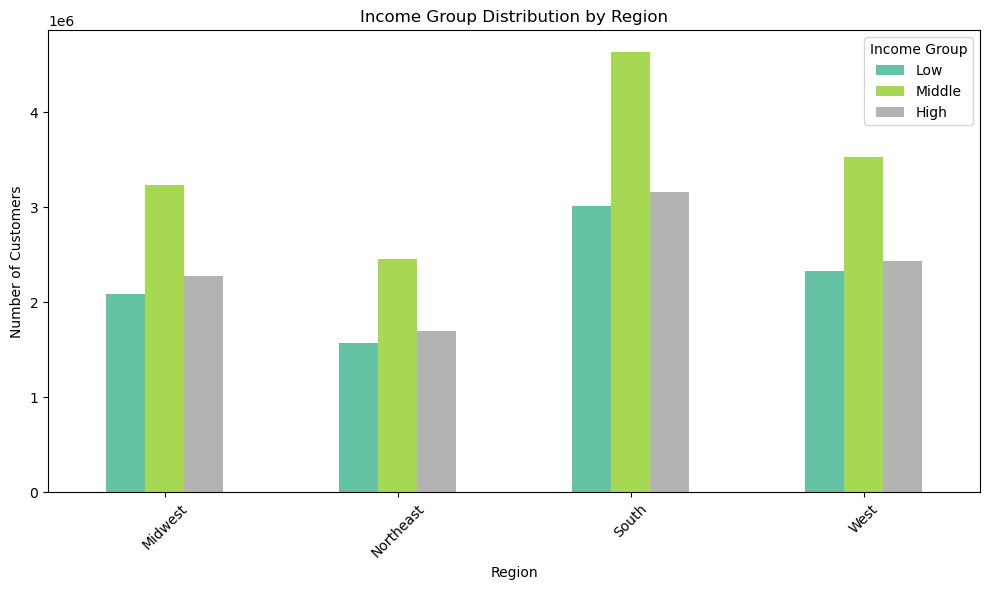

In [28]:
# Plot grouped bar chart
bar = crosstab.plot(kind='bar', figsize=(10,6), colormap='Set2')

plt.title('Income Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.tight_layout()

# Exporting grouped bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'grouped_bar_income_region.png'))

plt.show()


In [29]:
# crosstabing region and customer loyalty
crosstab = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)
crosstab.to_clipboard()

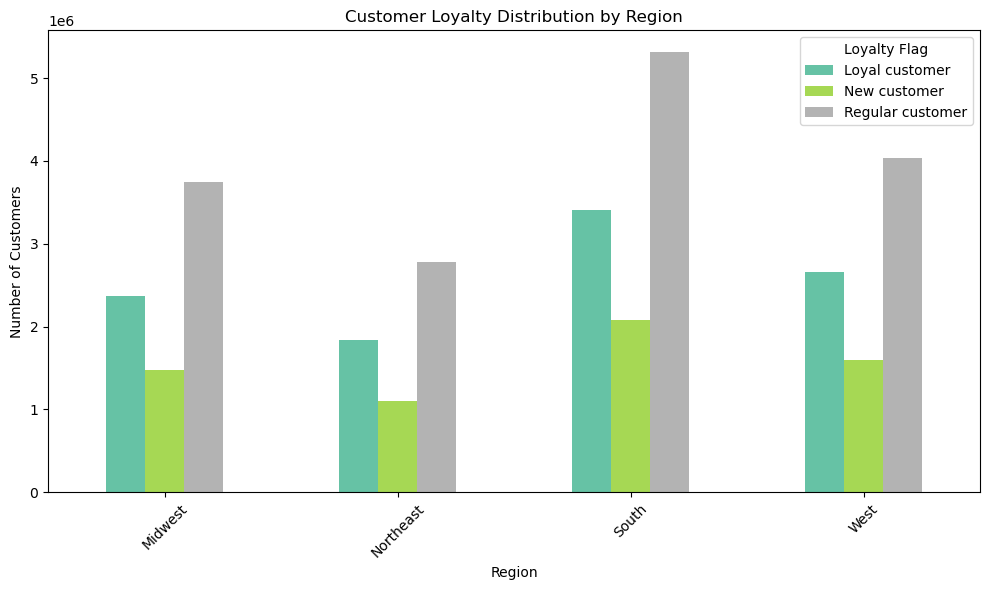

In [30]:
# creating bar grouped bar chart for loyalty across regions
bar = crosstab.plot(kind='bar', figsize=(10,6), colormap='Set2')

plt.title('Customer Loyalty Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Loyalty Flag')
plt.tight_layout()

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_region.png'))

plt.show()

In [31]:
# Find the largest household size in the dataset
df['household_size'].max()

3

In [32]:
# create household bins
bins = [0, 1, 2, 3]   # edges for 1, 2, and 3 people
labels = ['1 person', '2 people', '3 people']
df['household_group'] = pd.cut(df['household_size'], bins=bins, labels=labels, right=True, include_lowest=True)

In [33]:
# crosstabbing region and household_group
crosstab = pd.crosstab(df['region'], df['household_group'], dropna=False)
crosstab.to_clipboard()

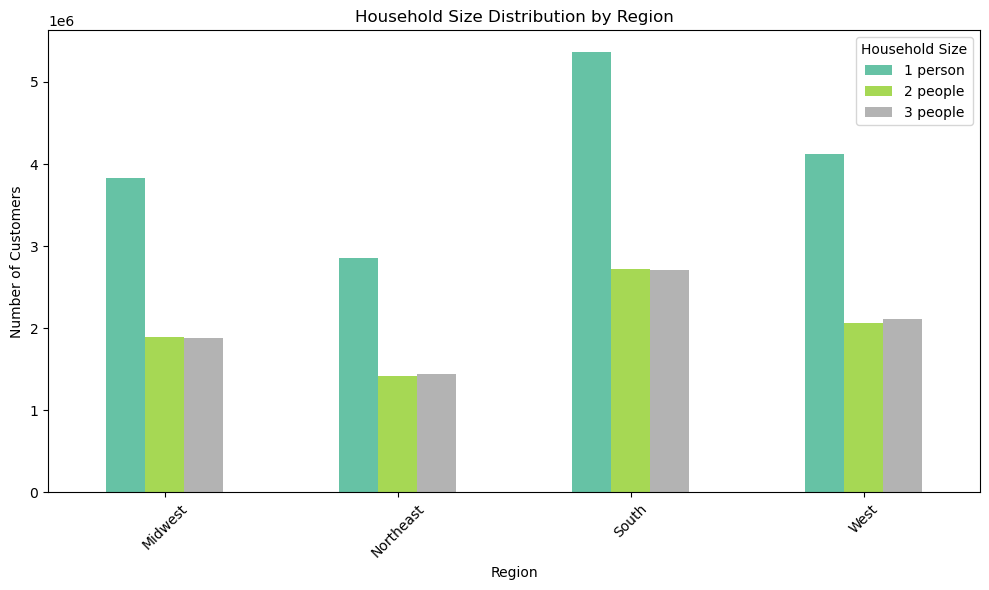

In [34]:
crosstab = pd.crosstab(df['region'], df['household_group'], dropna=False)

bar = crosstab.plot(kind='bar', figsize=(10,6), colormap='Set2')

plt.title('Household Size Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Household Size')
plt.tight_layout()

# exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_household_size_region.png'))

plt.show()

In [35]:
# crosstabbing region and busiest_period_of_day
crosstab = pd.crosstab(df['region'], df['busiest_period_of_day'], dropna=False)
crosstab.to_clipboard()

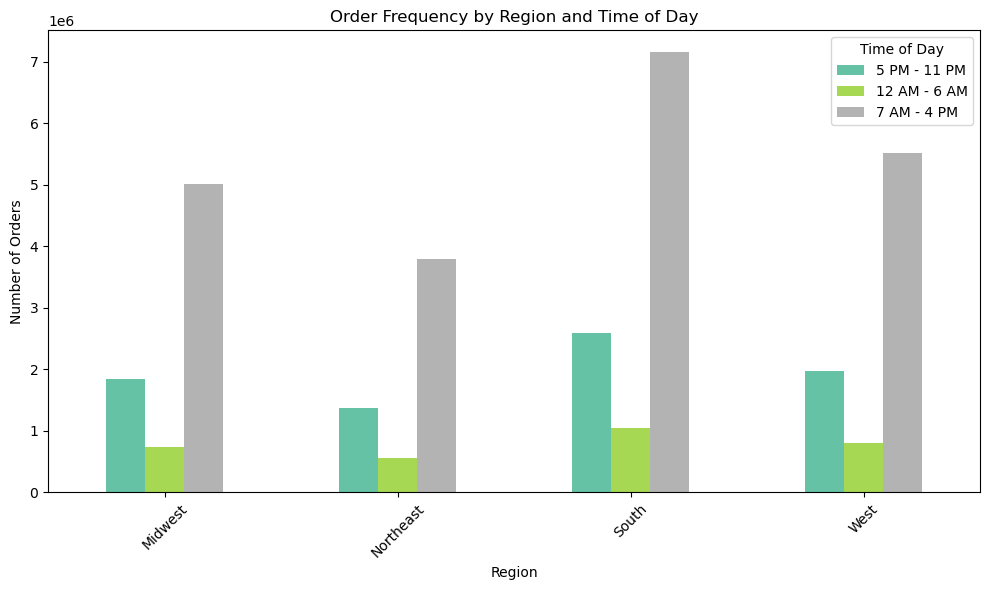

In [36]:
# Create a DataFrame with order counts by region and order type, then set 'region' as the index
data = {
    'region': ['Midwest', 'Northeast', 'South', 'West'],
    'Average Orders': [1841050, 1373112, 2596777, 1979856],
    'Fewest Orders': [736912, 553067, 1040458, 801093],
    'Most orders': [5019363, 3796557, 7154650, 5511964]
}

df_ct = pd.DataFrame(data).set_index('region')

# Rename columns to daytime periods
df_ct.rename(columns={
    'Most orders': '7 AM - 4 PM',
    'Average Orders': '5 PM - 11 PM',
    'Fewest Orders': '12 AM - 6 AM'
}, inplace=True)

# Plot grouped bar chart and assign to variable
bar = df_ct.plot(kind='bar', figsize=(10,6), colormap='Set2')

plt.title('Order Frequency by Region and Time of Day')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.tight_layout()

# Export the figure using the Axes object
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_region.png'))

plt.show()



In [37]:
# crosstabbing region and spending
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna=False)
crosstab.to_clipboard()

In [38]:
# Get unique ages sorted in ascending order
sorted_ages = sorted(df['age'].unique())

In [39]:
# Define age bins and labels
bins = [0, 30, 45, 60, float('inf')]
labels = ['Under 30', '30–44', '45–59', '60+']

# Create age group column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [40]:
# getting value counts for each age group
df['age_group'].value_counts()

age_group
60+         11067255
45–59        7647520
30–44        7599643
Under 30     6090441
Name: count, dtype: int64

In [41]:
# Crosstab of region vs. age group
crosstab = pd.crosstab(df['region'], df['age_group'], dropna=False)
crosstab.to_clipboard()

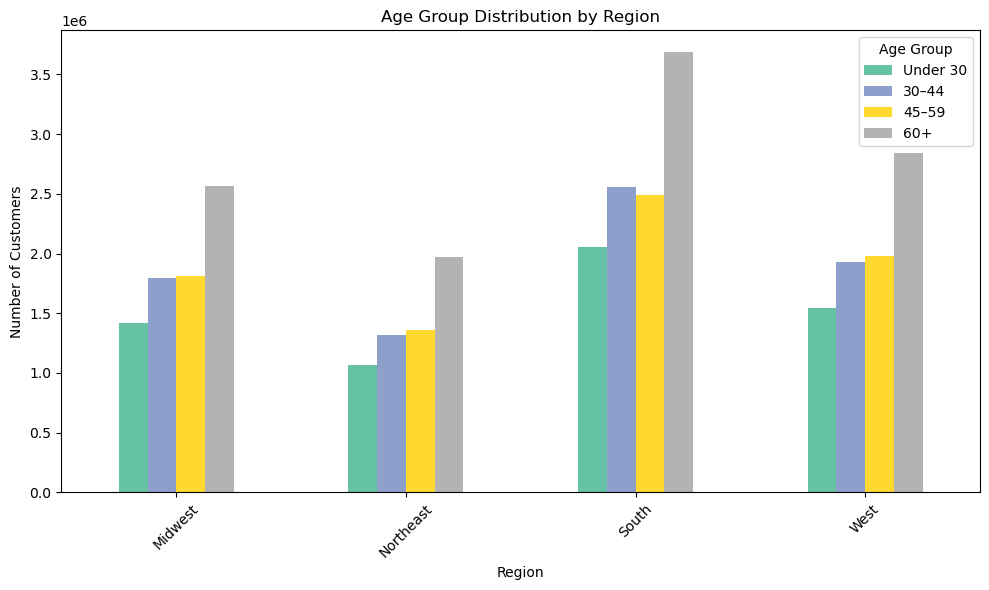

In [42]:
# Create bar chart of age group distribution by region
bar = crosstab.plot(kind='bar', figsize=(10, 6), colormap='Set2')

plt.title('Age Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()

# Export chart to file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region.png'))

plt.show()

In [43]:
# Create 'family_status' column based on household size (1 = Single, else Not Single)
df['family_status'] = df['household_size'].apply(lambda x: 'Single' if x == 1 else 'Not Single')

In [44]:
# Crosstab age group and family status against busiest ordering time
crosstab = pd.crosstab(
    [df['age_group'], df['family_status']],   # rows: age group + family status
    df['busiest_period_of_day'],              # columns: ordering time
    dropna=False
)

# Copy crosstab result to clipboard for easy pasting (e.g. into Excel)
crosstab.to_clipboard()

In [45]:
# Rename columns to daytime periods
crosstab.rename(columns={
    'Most orders': '7 AM - 4 PM',
    'Average Orders': '5 PM - 11 PM',
    'Fewest Orders': '12 AM - 6 AM'
}, inplace=True)

In [46]:
# Normalize crosstab to get percentages per group
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

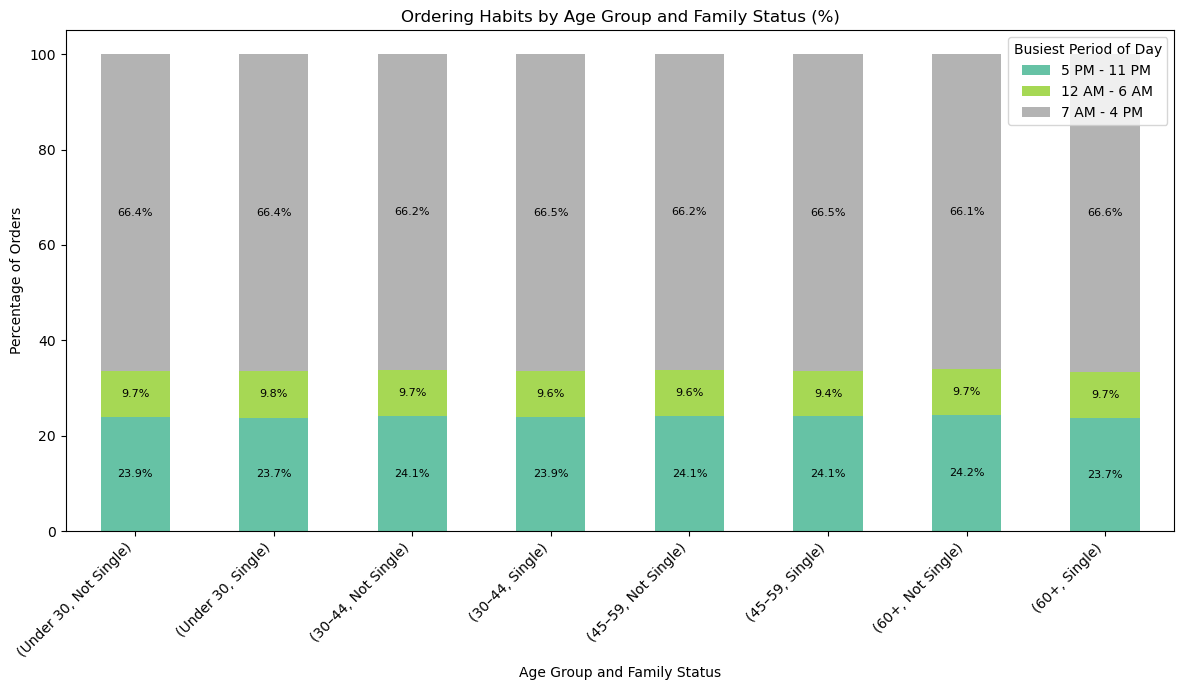

In [47]:
# Create stacked bar chart with percentages for each age/family status group
ax = crosstab_pct.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Set2')

plt.title('Ordering Habits by Age Group and Family Status (%)')
plt.xlabel('Age Group and Family Status')
plt.ylabel('Percentage of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Busiest Period of Day')
plt.tight_layout()

# Add percentage labels inside bars
for container in ax.containers:
    # container is one color stack of bars (e.g. morning, afternoon, evening)
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, color='black')

# Save and show as before
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_habits_age_fam_status_pct_labeled.png'))
plt.show()

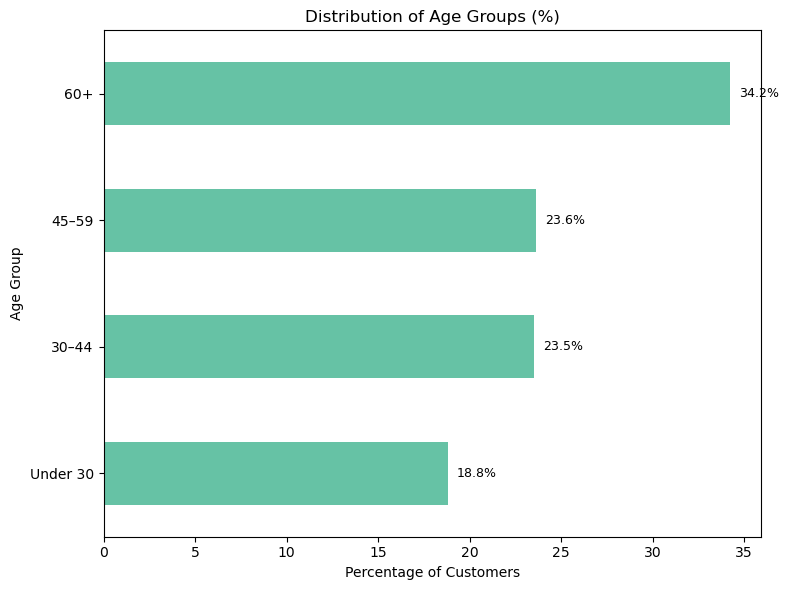

In [48]:
# Get value counts as percentages, sorted descending
age_pct = df['age_group'].value_counts(normalize=True).mul(100).round(1).sort_values(ascending=True)

# Plot horizontal bar chart
ax = age_pct.plot.barh(
    color='#66c2a5',  # soft green
    figsize=(8, 6)
)

# Add labels
for i, v in enumerate(age_pct):
    ax.text(v + 0.5, i, f'{v}%', va='center', fontsize=9)

# Customize chart
plt.title('Distribution of Age Groups (%)')
plt.xlabel('Percentage of Customers')
plt.ylabel('Age Group')
plt.tight_layout()

# Save figure
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_pct.png'))

plt.show()

In [49]:
# crosstab family status and age
crosstab = pd.crosstab(df['age_group'], df['family_status'], dropna=False)

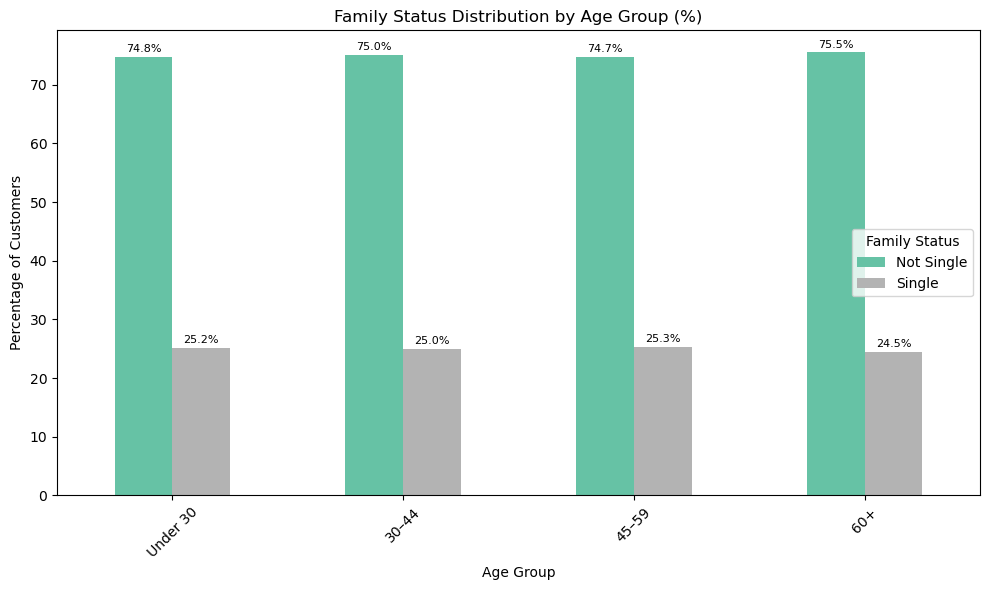

In [50]:
# Normalize crosstab by row to get percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
crosstab_pct = crosstab_pct.round(1)

# Plot grouped bar chart of percentages
ax = crosstab_pct.plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Set2'
)

# Add percentage labels to bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5,
                f'{height:.1f}%',
                ha='center',
                va='bottom',
                fontsize=8
            )

# Customize chart
plt.title('Family Status Distribution by Age Group (%)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45)
plt.legend(title='Family Status')
plt.tight_layout()

# Save chart
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pct_agegroup_familystatus.png'))

# Show chart
plt.show()

In [51]:
# Crosstab counts: departments (rows) x age groups (columns)
dept_age_crosstab = pd.crosstab(df['department_id'], df['age_group'])

# Convert to percentages per age group (column-wise normalization)
dept_age_pct = dept_age_crosstab.div(dept_age_crosstab.sum(axis=0), axis=1) * 100

# Optional: round percentages nicely
dept_age_pct = dept_age_pct.round(1)

print(dept_age_pct)

age_group        Under 30  30–44  45–59   60+
department_id                                
alcohol               0.5    0.5    0.5   0.5
babies                1.3    1.3    1.3   1.3
bakery                3.6    3.6    3.6   3.6
beverages             8.2    8.2    8.4   8.3
breakfast             2.2    2.2    2.2   2.2
bulk                  0.1    0.1    0.1   0.1
canned goods          3.3    3.3    3.3   3.3
dairy eggs           16.7   16.7   16.6  16.6
deli                  3.2    3.2    3.2   3.2
dry goods pasta       2.7    2.7    2.7   2.7
frozen                6.9    6.8    6.9   6.9
household             2.3    2.3    2.3   2.3
international         0.8    0.8    0.8   0.8
meat seafood          2.2    2.2    2.2   2.2
missing               0.2    0.2    0.2   0.2
other                 0.1    0.1    0.1   0.1
pantry                5.8    5.8    5.8   5.8
personal care         1.4    1.4    1.4   1.4
pets                  0.3    0.3    0.3   0.3
produce              29.1   29.4  

In [52]:
dept_age_pct.to_clipboard()

In [53]:
# Drop duplicates to ensure each order_id is only counted once per age_group
unique_orders = df[['order_id', 'age_group']].drop_duplicates()

# Count number of unique orders per age group
order_freq = unique_orders['age_group'].value_counts().sort_index()

In [54]:
print(order_freq)

age_group
Under 30     600982
30–44        752036
45–59        760194
60+         1101473
Name: count, dtype: int64


In [55]:
order_freq.to_clipboard()

In [57]:
# Filter to reordered products only
reorders = df[df['reordered'] == 1]

# Count total reordered products per age group
reorder_counts = reorders['age_group'].value_counts().sort_index()

In [58]:
reorder_counts.to_clipboard()

In [60]:
df['age_group'].value_counts().to_clipboard()

In [61]:
# Export file
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_final.pkl'))

In [62]:
df.shape

(32404859, 34)